<a href="https://colab.research.google.com/github/hlybrower/IS-4487-Labs/blob/main/Lab_11_HBrower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS 4487 Module 5 Script

## Objectives

a. Understand model accuracy.  Why is it a performance metric for classification and not regression?
    
b. Calculate accuracy for a simple majority class model (this is the same as calculating the proportion of the majority class in a binary variable). Consider: x <- c(1, 1, 1, 0, 0).  What is the majority class? What is the proportion of the majority class in x?
    
c. Fit a tree model of the target with just one predictor variable and calculate the accuracy of this model.
    
d. Interpret a tree model, and calculate information gain.
    
e. Fit a tree model of the target using all the predictors, then:  create a visualization of the tree and identify the top 3 most important predictors in this model.
    
f. How do these models compare to majority class prediction?
    
g. How will you use a classification model as part of a solution to the AdviseInvest case?

We will use the MegaTelCo data for this demonstration.

##Load Libraries

In this class we will be using 
- Pandas
- Scikitlearn
- Matplotlib


In [22]:
import pandas as pd
import matplotlib as mpl
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree


## Getting data into Pandas

In this case we will load data from the statsmodels.org library

See the Canvas assignments and lectures for a description of the Megatelco data

**Note:** you will need to enter a code supplied by Google in the next step. 


In [2]:
from google.colab import drive 
drive.mount('/content/drive', force_remount=True)

df = pd.read_csv (r'/content/drive/MyDrive/airquality.csv')

Mounted at /content/drive


In [3]:
#look at the top rows
df.head(10) 

,State Name,county Name,State Code,County Code,Date,AQI,Category,Defining Parameter,Defining Site,Number of Sites Reporting
0,Alabama,Baldwin,1,3,2021-01-01,27,Good,PM2.5,01-003-0010,1
1,Alabama,Baldwin,1,3,2021-01-04,47,Good,PM2.5,01-003-0010,1
2,Alabama,Baldwin,1,3,2021-01-07,24,Good,PM2.5,01-003-0010,1
3,Alabama,Baldwin,1,3,2021-01-10,39,Good,PM2.5,01-003-0010,1
4,Alabama,Baldwin,1,3,2021-01-13,46,Good,PM2.5,01-003-0010,1
5,Alabama,Baldwin,1,3,2021-01-16,21,Good,PM2.5,01-003-0010,1
6,Alabama,Baldwin,1,3,2021-01-19,52,Moderate,PM2.5,01-003-0010,1
7,Alabama,Baldwin,1,3,2021-01-22,11,Good,PM2.5,01-003-0010,1
8,Alabama,Baldwin,1,3,2021-01-25,39,Good,PM2.5,01-003-0010,1
9,Alabama,Baldwin,1,3,2021-01-28,22,Good,PM2.5,01-003-0010,1


In [4]:
#look at the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 218196 entries, 0 to 218195
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   State Name                 218196 non-null  object
 1   county Name                218196 non-null  object
 2   State Code                 218196 non-null  int64 
 3   County Code                218196 non-null  int64 
 4   Date                       218196 non-null  object
 5   AQI                        218196 non-null  int64 
 6   Category                   218196 non-null  object
 7   Defining Parameter         218196 non-null  object
 8   Defining Site              218196 non-null  object
 9   Number of Sites Reporting  218196 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 16.6+ MB


In [5]:
#describe the data before cleaning it
df.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,218196.000000,218196.000000,218196.000000,218196.000000
mean,30.178390,82.098265,39.584250,1.924220
std,15.755914,89.555906,21.547055,2.251967
min,1.000000,1.000000,0.000000,1.000000
25%,18.000000,25.000000,29.000000,1.000000
50%,30.000000,61.000000,38.000000,1.000000
75%,42.000000,111.000000,47.000000,2.000000
max,80.000000,810.000000,2723.000000,34.000000


## Clean up the data
Did you notice anything unusual about the "house" amounts? 

How about the handset price and income?

Clean up the data in a  new datafram named "df_clean"


In [8]:
#Just focusing information for the county of salt lake, so eliminate all other info
df_sl= df[(df['county Name']=='Salt Lake')]

df_sl.describe()

,State Code,County Code,AQI,Number of Sites Reporting
count,305.0,305.0,305.000000,305.000000
mean,49.0,35.0,66.406557,7.767213
std,0.0,0.0,31.386470,0.460521
min,49.0,35.0,6.000000,5.000000
25%,49.0,35.0,44.000000,8.000000
50%,49.0,35.0,54.000000,8.000000
75%,49.0,35.0,84.000000,8.000000
max,49.0,35.0,177.000000,8.000000


# Standardize attributes

- Convert the "college" and "considering_change_of_plan" attributes to 0 or 1
- Convert non-numeric attributes to numeric scale of 1-3


In [9]:
#Get distinct values
df_sl['Category'].unique() 

array(['Moderate', 'Good', 'Unhealthy for Sensitive Groups', 'Unhealthy'],
      dtype=object)

In [10]:
#Finding mean value of AQI
df_sl['AQI'].mean()

66.40655737704918

## Fit a FULL tree model

Use just two variables, 'income' and 'house'. We'll call this the "money tree." 

What is the accuracy of the money tree? 

In [13]:
# split the datafram into independent (x) and dependent (predicted) attributes (y)
x = df_sl[['State Code', 'County Code', 'AQI', 'Number of Sites Reporting']]
y = df_sl['Category']
y = y.astype('str')

sl_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 1 )

# Create Decision Tree Classifer
sl_tree = sl_tree.fit(x,y)


## Preview the tree


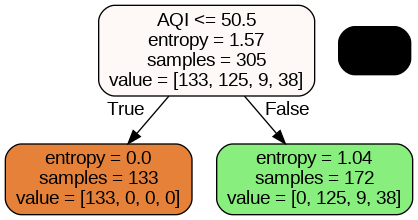

In [14]:
from six import StringIO
from IPython.display import Image  
import pydotplus    

dot_data = StringIO()
export_graphviz(sl_tree, out_file=dot_data, 
                   feature_names=x.columns, 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Check Accuracy

What is the accuracy of the money_tree? Use these steps to calculate accuracy.

Is this over fitted?

In [15]:
pred = sl_tree.predict(x)

#print(pred)

print("Accuracy:",metrics.accuracy_score(y, pred))

Accuracy: 0.8459016393442623


##Test and Train
Now we will split the dataset into 80% training data and 20% test data

In [16]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

##Create a new tree using only training data

In [17]:
train_tree = DecisionTreeClassifier(criterion="entropy", max_depth=5)

# Create Decision Tree Classifer
train_tree = train_tree.fit(x_train,y_train)

##Apply the new tree to our test data

In [18]:
pred = train_tree.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred))

Accuracy: 0.9836065573770492


## Visualize the trained tree

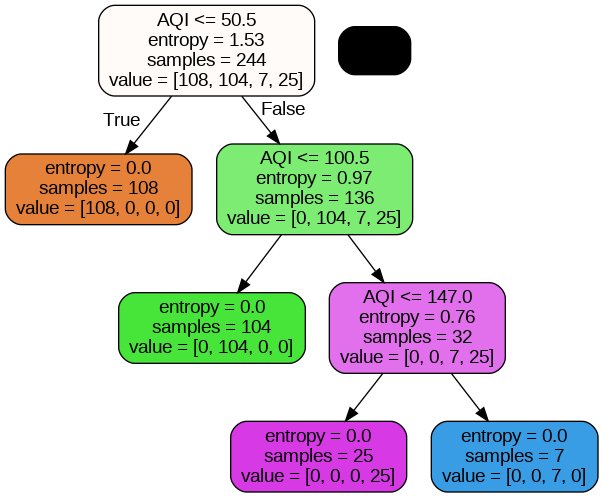

In [24]:
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(train_tree, out_file=dot_data, 
                   feature_names=x.columns, 
                   filled=True,rounded=True, precision =2)

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Did the model improve?
👎  👍